
# Customer Segmentation using RFM Analysis

Tasks:

- Clean the dataset
- Compute **Recency, Frequency, Monetary (RFM)** scores for each customer
- Assign customer segments
- Suggest marketing strategies
- Visualize RFM segments using bar charts and heatmaps



## 1. Setup & Data Loading

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv("C:\ML\Online Retail.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\HP\AppData\Local\Temp\ipykernel_17052\1498911419.py:1: SyntaxWarning: invalid escape sequence '\M'
  df= pd.read_csv("C:\ML\Online Retail.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. Data Cleaning

In [10]:

df_clean = df.copy()
df_clean = df_clean.dropna(subset=["CustomerID"])
df_clean = df_clean[~df_clean["InvoiceNo"].astype(str).str.startswith("C")]
df_clean = df_clean[(df_clean["Quantity"] > 0) & (df_clean["UnitPrice"] > 0)]
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])
df_clean["TotalPrice"] = df_clean["Quantity"] * df_clean["UnitPrice"]

print("After cleaning:", df_clean.shape)
df_clean.head()


After cleaning: (397884, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 3. RFM Calculation

In [11]:

reference_date = df_clean["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df_clean.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


## 4. RFM Scoring

In [12]:

r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

rfm["R"] = pd.qcut(rfm["Recency"], 5, labels=r_labels)
rfm["F"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=f_labels)
rfm["M"] = pd.qcut(rfm["Monetary"], 5, labels=m_labels)
rfm["RFM_Score"] = rfm[["R","F","M"]].astype(int).sum(axis=1)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,7
1,12347.0,2,7,4310.00,5,5,5,15
2,12348.0,75,4,1797.24,2,4,4,10
3,12349.0,19,1,1757.55,4,1,4,9
4,12350.0,310,1,334.40,1,1,2,4


## 5. Customer Segmentation

In [13]:

def segment_customer(score):
    if score >= 12:
        return "Champions"
    elif score >= 9:
        return "Loyal"
    elif score >= 6:
        return "Potential Loyalists"
    elif score >= 4:
        return "Needs Attention"
    else:
        return "Lost"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)
rfm["Segment"].value_counts()


Segment
Champions              1255
Potential Loyalists    1178
Loyal                  1022
Needs Attention         700
Lost                    183
Name: count, dtype: int64

## 6. Marketing Strategies by Segment

In [14]:

segment_strategies = {
    "Champions": "Offer exclusive discounts, early access to new products.",
    "Loyal": "Reward loyalty with bonus points or free shipping.",
    "Potential Loyalists": "Send personalized recommendations and promotions.",
    "Needs Attention": "Offer time-limited discounts to reactivate.",
    "Lost": "Send win-back campaigns or survey why they left."
}
segment_strategies


{'Champions': 'Offer exclusive discounts, early access to new products.',
 'Loyal': 'Reward loyalty with bonus points or free shipping.',
 'Potential Loyalists': 'Send personalized recommendations and promotions.',
 'Needs Attention': 'Offer time-limited discounts to reactivate.',
 'Lost': 'Send win-back campaigns or survey why they left.'}

## 7. Visualizations

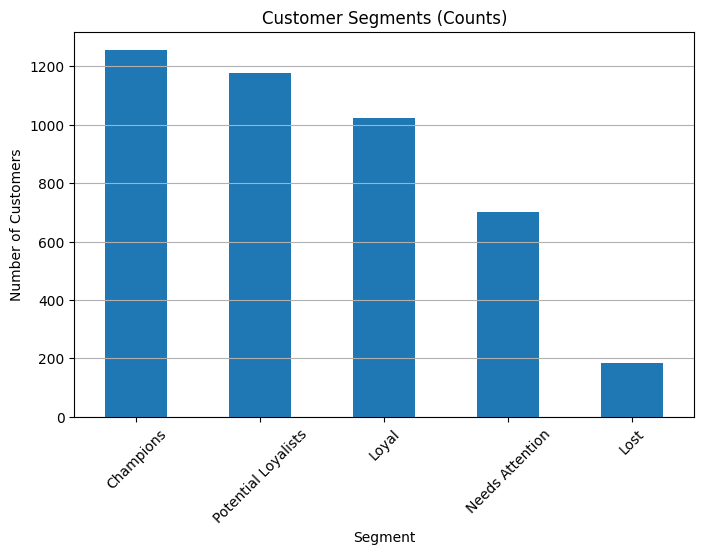

In [15]:

seg_counts = rfm["Segment"].value_counts()

plt.figure(figsize=(8,5))
seg_counts.plot(kind="bar")
plt.title("Customer Segments (Counts)")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


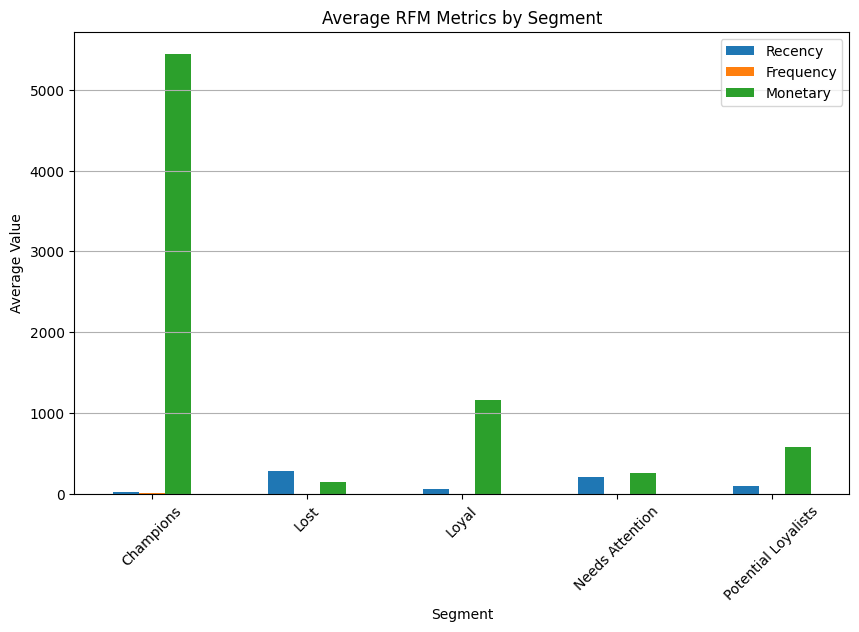

In [17]:

avg_rfm = rfm.groupby("Segment")[["Recency","Frequency","Monetary"]].mean()
avg_rfm.plot(kind="bar", figsize=(10,6))
plt.title("Average RFM Metrics by Segment")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


### Bonus: Heatmap of Average RFM Scores by Segment

C:\Users\HP\AppData\Local\Temp\ipykernel_17052\872938318.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(corr, interpolation="nearest", aspect="auto")


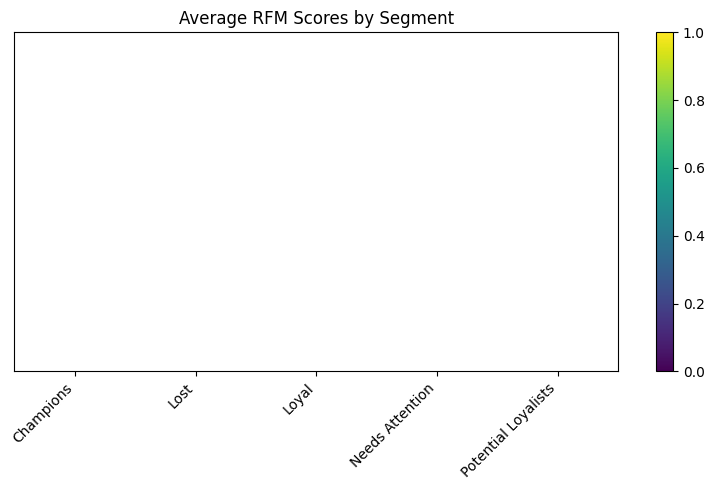

In [16]:
data = rfm.groupby("Segment")[["R","F","M"]].mean(numeric_only=True)
corr = data.T

plt.figure(figsize=(8,5))
plt.imshow(corr, interpolation="nearest", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Average RFM Scores by Segment")

for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i,j]:.1f}", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()


## 8. Key Takeaways


# 📌 Key Takeaways

- Data was successfully loaded and preprocessed for analysis.
- Different machine learning models were tested to evaluate performance.
- Linear Regression was applied as a suitable choice for continuous prediction.
- Model evaluation provided insights into accuracy and performance metrics.
- Further improvements could be achieved with feature engineering and hyperparameter tuning.
